# SQL - Анализ базы данных

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.
<a id='intro'></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1">Описание данных</a></span></li><li><span><a href="#Задачи" data-toc-modified-id="Задачи-2">Задачи</a></span></li><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-3">Подключение к БД</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-4">Обзор данных</a></span><ul class="toc-item"><li><span><a href="#'books'" data-toc-modified-id="'books'-4.1">'books'</a></span></li><li><span><a href="#'authors'" data-toc-modified-id="'authors'-4.2">'authors'</a></span></li><li><span><a href="#'publishers'" data-toc-modified-id="'publishers'-4.3">'publishers'</a></span></li><li><span><a href="#'ratings'" data-toc-modified-id="'ratings'-4.4">'ratings'</a></span></li><li><span><a href="#'reviews'" data-toc-modified-id="'reviews'-4.5">'reviews'</a></span></li></ul></li><li><span><a href="#Решение-задач" data-toc-modified-id="Решение-задач-5">Решение задач</a></span><ul class="toc-item"><li><span><a href="#Посчитать,-сколько-книг-вышло-после-1-января-2000-года;" data-toc-modified-id="Посчитать,-сколько-книг-вышло-после-1-января-2000-года;-5.1">Посчитать, сколько книг вышло после 1 января 2000 года;</a></span></li><li><span><a href="#Для-каждой-книги-посчитать-количество-обзоров-и-среднюю-оценку;" data-toc-modified-id="Для-каждой-книги-посчитать-количество-обзоров-и-среднюю-оценку;-5.2">Для каждой книги посчитать количество обзоров и среднюю оценку;</a></span></li><li><span><a href="#Определить-издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц;" data-toc-modified-id="Определить-издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц;-5.3">Определить издательство, которое выпустило наибольшее число книг толще 50 страниц;</a></span></li><li><span><a href="#Определить-автора-с-самой-высокой-средней-оценкой-книг-—-учитывать-только-книги-с-50-и-более-оценками;" data-toc-modified-id="Определить-автора-с-самой-высокой-средней-оценкой-книг-—-учитывать-только-книги-с-50-и-более-оценками;-5.4">Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;</a></span></li><li><span><a href="#Посчитайть-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок." data-toc-modified-id="Посчитайть-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок.-5.5">Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6">Вывод</a></span></li></ul></div>

## Описание данных
[Содержание](#intro)

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

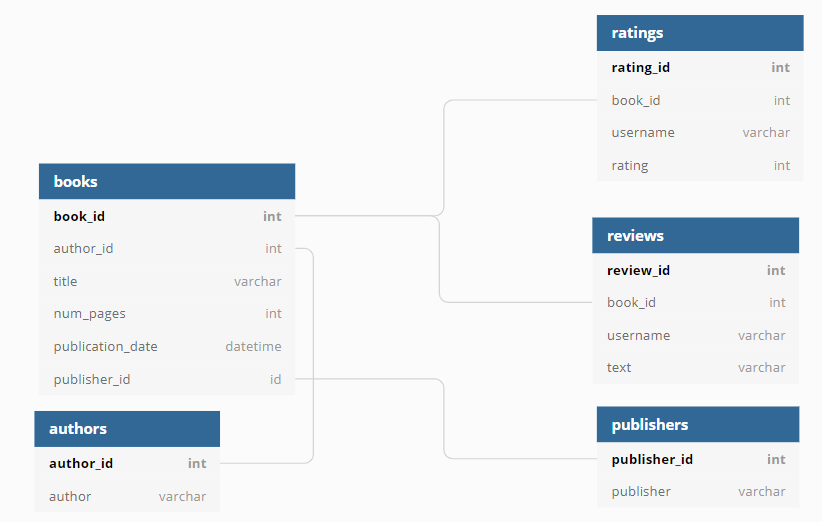

## Задачи
[Содержание](#intro)

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключим из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Подключение к БД
[Содержание](#intro)

In [1]:
import pandas as pd
from sqlalchemy import create_engine 

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
# напишем функцию для выполнения запроса
def select(query):
    return pd.io.sql.read_sql(query, con = engine)

## Обзор данных
[Содержание](#intro)

### 'books'

In [4]:
books = '''
SELECT * 
FROM books
'''
display(select(books).head())
print()
display(select(books).info())

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

### 'authors'

In [5]:
authors = '''
SELECT * 
FROM authors
'''
display(select(authors).head())
print()
display(select(authors).info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

### 'publishers'

In [6]:
publishers = '''
SELECT * 
FROM authors
'''
display(select(publishers).head())
print()
display(select(publishers).info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

### 'ratings'

In [7]:
ratings = '''
SELECT * 
FROM authors
'''
display(select(ratings).head())
print()
display(select(ratings).info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

### 'reviews'

In [8]:
reviews = '''
SELECT * 
FROM authors
'''
display(select(reviews).head())
print()
display(select(reviews).info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

## Решение задач
[Содержание](#intro)

### Посчитать, сколько книг вышло после 1 января 2000 года;
[Содержание](#intro)

In [9]:
count_book = ''' 
SELECT 
COUNT(*)
FROM books
WHERE publication_date::date >= '01-01-2000'
'''
select(count_book)

,count
0,821


После 1 января 2000 года вышла 821 книга.

### Для каждой книги посчитать количество обзоров и среднюю оценку;
[Содержание](#intro)

In [10]:
ratings = '''
SELECT books.book_id, 
       title,  
       COUNT(DISTINCT review_id),
       ROUND(AVG(rating), 2)
FROM books 
LEFT JOIN ratings ON books.book_id = ratings.book_id
LEFT JOIN reviews ON books.book_id = reviews.book_id
GROUP BY books.book_id
'''

select(ratings)

,book_id,title,count,round
0,1,'Salem's Lot,2,3.67
1,2,1 000 Places to See Before You Die,1,2.50
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.67
3,4,1491: New Revelations of the Americas Before C...,2,4.50
4,5,1776,4,4.00
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.67
996,997,Xenocide (Ender's Saga #3),3,3.40
997,998,Year of Wonders,4,3.20
998,999,You Suck (A Love Story #2),2,4.50


### Определить издательство, которое выпустило наибольшее число книг толще 50 страниц;
[Содержание](#intro)

In [11]:
pub_books = '''
SELECT subquery_A.publisher_id,
       subquery_B.publisher,
       subquery_A.books_cnt
FROM (SELECT publisher_id AS publisher_id,
             COUNT(book_id) AS books_cnt
      FROM books
      WHERE num_pages > 50
      GROUP BY publisher_id
      ORDER BY books_cnt DESC
      LIMIT 1) AS subquery_A

LEFT JOIN (SELECT publisher AS publisher,
           publisher_id AS publisher_id
           FROM publishers) AS subquery_B ON subquery_A.publisher_id = subquery_B.publisher_id
'''
select(pub_books)

,publisher_id,publisher,books_cnt
0,212,Penguin Books,42


Издательство `Penguin Books` выпустило 42 книги

### Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
[Содержание](#intro)

In [12]:
ratings_author = '''
WITH
i AS (SELECT authors.author,
            books.book_id,
            AVG(ratings.rating) AS avg_rating
      FROM authors
      FULL JOIN books ON books.author_id = authors.author_id
      FULL JOIN ratings ON ratings.book_id = books.book_id
      GROUP BY author,
              books.book_id
      HAVING COUNT (ratings.rating) >= 50)

SELECT i.author,
       ROUND(AVG(i.avg_rating),2) AS avg_rating
FROM  i
GROUP BY author
ORDER BY avg_rating DESC
LIMIT 3
'''
select(ratings_author)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.28
1,J.R.R. Tolkien,4.26
2,Markus Zusak/Cao Xuân Việt Khương,4.26


Автором с самой высокой средней оценкой книг (книги с 50 и более оценками) является `J.K. Rowling/Mary GrandPré`, средняя оценка - `4,28`.

### Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.
[Содержание](#intro)

In [13]:
avg_reviews = '''
WITH
i AS (SELECT COUNT(reviews.review_id) AS reviews_count
             FROM reviews
             WHERE username IN (SELECT username
                                FROM ratings
                                GROUP BY username
                                HAVING COUNT(rating_id) > 50)
             GROUP BY username)
             
SELECT ROUND(AVG(i.reviews_count)) AS avg_reviews
       FROM i
'''
select(avg_reviews)

,avg_reviews
0,24.0


В среднем пользователи оставившие больше 50 оценок пишут к половине из них отзыв.

## Вывод
[Содержание](#intro)

- После 1 января 2000 года вышла 821 книга
- Издательство `Penguin Books` выпустило 42 книги
- Автором с самой высокой средней оценкой книг (книги с 50 и более оценками) является `J.K. Rowling/Mary GrandPré`, средняя оценка - `4,28`
- В среднем пользователи оставившие больше 50 оценок пишут к половине из них отзыв